In [14]:
from __future__ import division
import sys
import cv2
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy import misc
from depth_evaluation_utils import *
from PIL import Image, ImageDraw
import imageio

In [2]:
CMAP = 'plasma'

In [3]:
def gray2rgb(im, cmap='gray'):
    cmap = plt.get_cmap(cmap)
    rgba_img = cmap(im.astype(np.float32))
    rgb_img = np.delete(rgba_img, 3, 2)
    return rgb_img

def normalize_depth_for_display(depth, pc=95, crop_percent=0, normalizer=None, cmap='gray'):
    # convert to disparity
    depth = 1./(depth + 1e-6)
    if normalizer is not None:
        depth = depth/normalizer
    else:
        depth = depth/(np.percentile(depth, pc) + 1e-6)
    depth = np.clip(depth, 0, 1)
    depth = gray2rgb(depth, cmap=cmap)
    keep_H = int(depth.shape[0] * (1-crop_percent))
    depth = depth[:keep_H]
    depth = depth
    return depth

def convert_disps_to_depths_stereo(gt_disparities, pred_depths):
    gt_depths = []
    pred_depths_resized = []
    pred_disparities_resized = []

    for i in range(len(gt_disparities)):
        gt_disp = gt_disparities[i]
        height, width = gt_disp.shape

        pred_depth = pred_depths[i]
        pred_depth = cv2.resize(pred_depth, (width, height), interpolation=cv2.INTER_LINEAR)

        pred_disparities_resized.append(1./pred_depth)

        mask = gt_disp > 0

        gt_depth = width_to_focal[width] * 0.54 / (gt_disp + (1.0 - mask))
        #pred_depth = width_to_focal[width] * 0.54 / pred_disp

        gt_depths.append(gt_depth)
        pred_depths_resized.append(pred_depth)
    return gt_depths, pred_depths_resized, pred_disparities_resized

evaluating ../../results/kitti/test_kitti.npy...
[Info] Saving depth resutls to: ../../results/kitti_depths
[NUM TEST]: 697
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 8.150382 0.21970907
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 78.44499969482422 0.0
pred max and min: 80.0 4.7955017


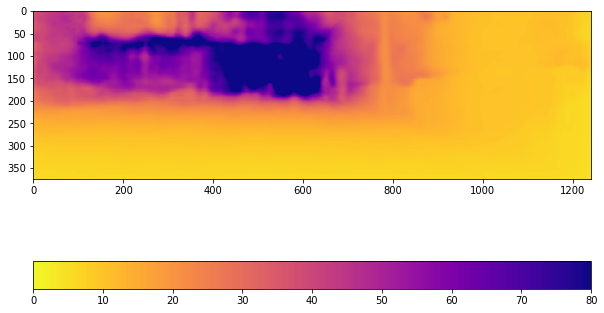

/home/garin/anaconda3/envs/python3.5_tf1.9/lib/python3.5/site-packages/ipykernel_launcher.py:92: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 78.44499969482422 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 11.232175 0.23093818
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 79.28500366210938 0.0
pred max and min: 80.0 4.705559


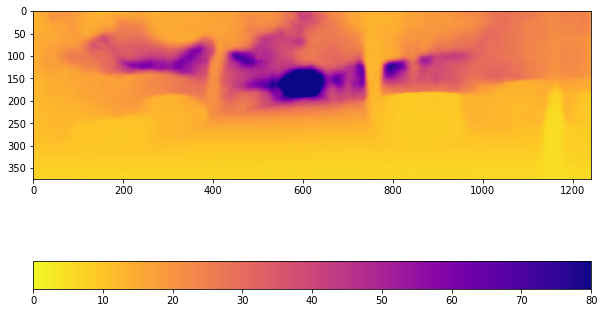

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 79.28500366210938 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 4.3243203 0.21218954
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 79.44999694824219 0.0
pred max and min: 73.15777 3.6002817


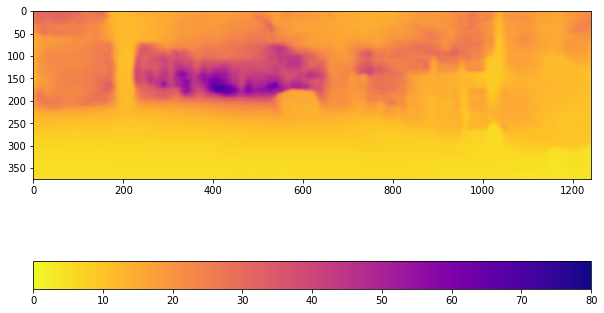

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 79.44999694824219 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 8.2795315 0.2454111
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 79.16400146484375 0.0
pred max and min: 80.0 4.5028043


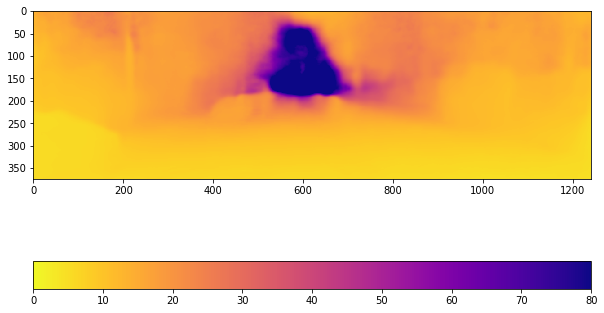

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 79.16400146484375 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 13.997969 0.22822428
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 79.27100372314453 0.0
pred max and min: 80.0 4.7286005


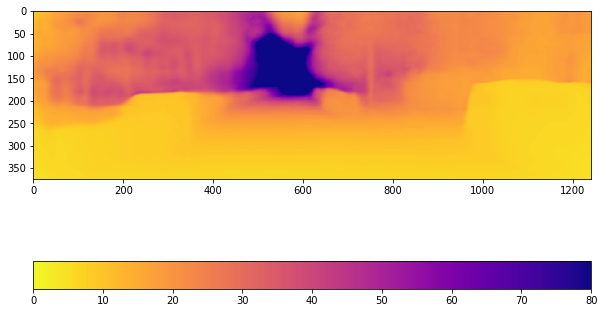

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 79.27100372314453 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 11.636784 0.24578764
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 76.97699737548828 0.0
pred max and min: 80.0 5.214605


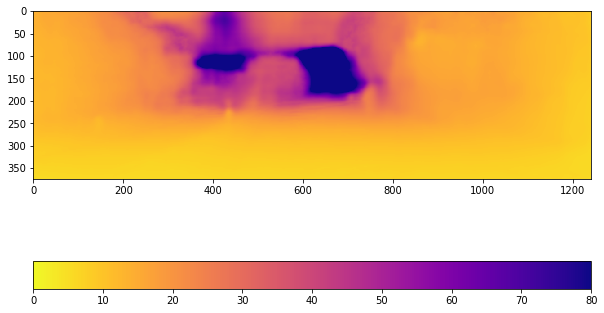

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 76.97699737548828 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 12.516094 0.23716761
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 78.97699737548828 0.0
pred max and min: 80.0 5.485192


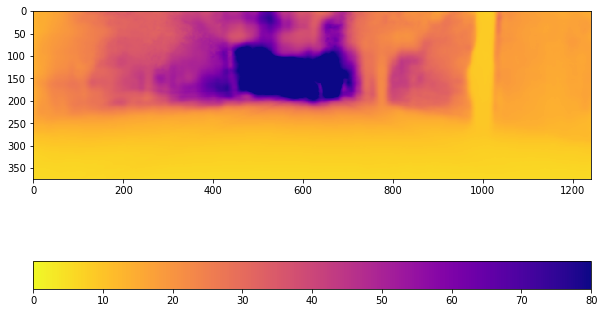

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 78.97699737548828 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 8.280596 0.24985138
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 72.41799926757812 0.0
pred max and min: 80.0 3.7611501


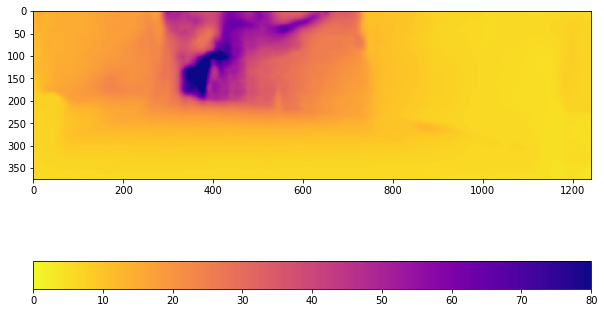

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 72.41799926757812 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 12.604422 0.21783721
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 79.37999725341797 0.0
pred max and min: 80.0 4.359199


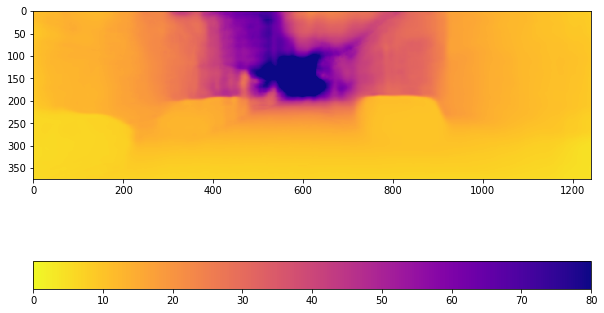

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 79.37999725341797 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 6.2151566 0.24056825
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 79.13899993896484 0.0
pred max and min: 80.0 3.131214


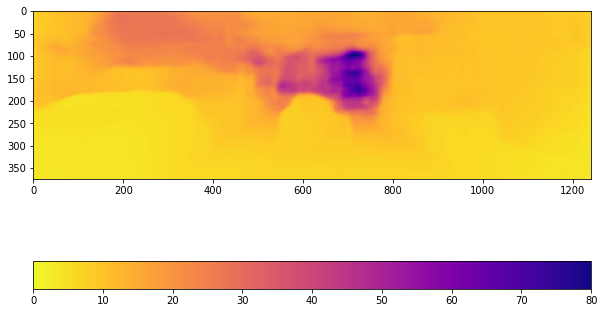

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 79.13899993896484 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 6.2121058 0.24339515
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 79.19400024414062 0.0
pred max and min: 80.0 5.4556527


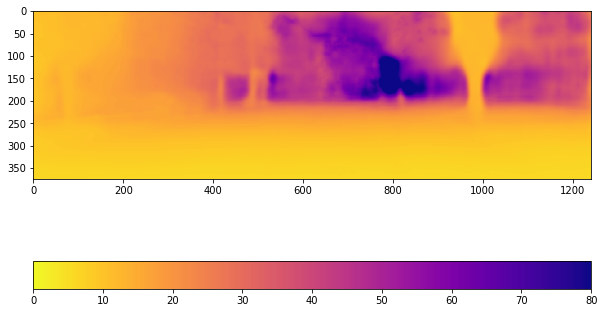

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 79.19400024414062 0.0
pred max and min: 0.994561 0.000564
*************************after load depth*************************
pred shape: (256, 832)
pred max and min: 14.705897 0.20761715
*************************after cv2.resize
gt   shape: (375, 1242)
pred shape: (375, 1242)
gt   max and min: 77.26799774169922 0.0
pred max and min: 80.0 3.648233


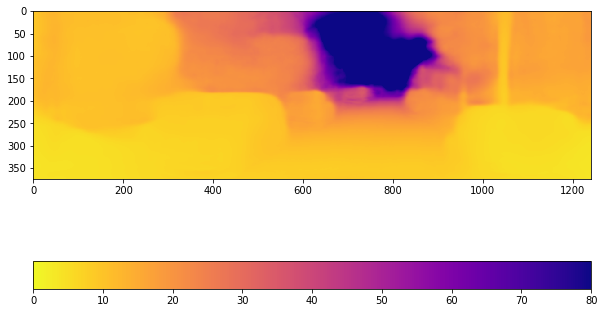

*************************after normalize_depth_for_display
gt shape: (375, 1242)
pred shape: (375, 1242, 3)
gt   max and min: 77.26799774169922 0.0
pred max and min: 0.994561 0.000564


In [ ]:
pred_depths = np.load('../../results/kitti/test_kitti.npy')

print('evaluating ' + '../../results/kitti/test_kitti.npy' + '...')


test_files = read_text_lines('./kitti/test_files_eigen.txt')
assert len(pred_depths) == len(test_files)

gt_files, gt_calib, im_sizes, im_files, cams = read_file_data(test_files, '/home/waterman/dataset/KITTI/')
num_test = len(im_files)

depth_path = '../../results/kitti_depths'
if not os.path.exists(depth_path):
    os.mkdir(depth_path)
print("[Info] Saving depth resutls to: " + depth_path)

print('[NUM TEST]: %d' % num_test)

gt_depths = []
pred_depths_resized = []
for t_id in range(num_test):

    if t_id % 30 == 0:
        print('*'*25+'after load depth'+'*'*25)
        print("pred shape:", pred_depths[t_id].shape)
        print("pred max and min:", np.max(pred_depths[t_id]), np.min(pred_depths[t_id]))

    camera_id = cams[t_id]  # 2 is left, 3 is right
    # print("[%d] resize to %d %d" % (t_id, im_sizes[t_id][1], im_sizes[t_id][0]))
    pred_depth_resized = cv2.resize(pred_depths[t_id],
                            (im_sizes[t_id][1], im_sizes[t_id][0]),
                            interpolation=cv2.INTER_LINEAR)


    pred_depths_resized.append(pred_depth_resized)
    depth = generate_depth_map(gt_calib[t_id],
                               gt_files[t_id],
                               im_sizes[t_id],
                               camera_id,
                               False,
                               True)
    gt_depths.append(depth.astype(np.float32))
    
    
    if t_id % 30 == 0:
        gt = depth
        visual = pred_depth_resized


        mask = np.logical_and(gt > 1e-3,
                              gt < 80)
        # crop used by Garg ECCV16 to reprocude Eigen NIPS14 results
        # if used on gt_size 370x1224 produces a crop of [-218, -3, 44, 1180]
        gt_height, gt_width = gt.shape
        crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,
                         0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)

        crop_mask = np.zeros(mask.shape)
        crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1
        mask = np.logical_and(mask, crop_mask)



        # Scale matching
        scalor = np.median(gt[mask])/np.median(visual[mask])
        visual *= scalor
        visual[visual < 1e-3] = 1e-3
        visual[visual > 80] = 80
        
        ###########################
        print('*'*25+'after cv2.resize')
        print("gt   shape:", depth.shape)
        print("pred shape:", visual.shape)
        print("gt   max and min:", np.max(depth), np.min(depth))
        print("pred max and min:", np.max(visual), np.min(visual))
        
        cmap = plt.get_cmap('plasma')
        cmap = clr.ListedColormap(cmap.colors[::-1])
        
        fig = plt.figure(figsize=(10, 10))
        
        imgplot = plt.imshow(visual)
        imgplot.set_cmap(cmap)
        imgplot.set_clim(0, 80)
        plt.colorbar(orientation='horizontal')
        plt.show()



    filename = '_'.join(test_files[t_id].split('.')[0].split('/'))
    colored_map = normalize_depth_for_display(pred_depth_resized, cmap=CMAP)
    misc.imsave("%s/%s_pred_depth.png" % (depth_path, filename), colored_map)

    if t_id % 30 == 0:
        print('*'*25+'after normalize_depth_for_display')
        print("gt shape:", depth.shape)
        print("pred shape:", colored_map.shape)
        print("gt   max and min:", np.max(depth), np.min(depth))
        print("pred max and min:", np.max(colored_map), np.min(colored_map))

    # im_file = imageio.imread(im_files[t_id])
    # imageio.imwrite('%s_input/%s.png' % (depth_path, filename), im_file)
pred_depths = pred_depths_resized


In [ ]:
rms     = np.zeros(num_test, np.float32)
log_rms = np.zeros(num_test, np.float32)
abs_rel = np.zeros(num_test, np.float32)
sq_rel  = np.zeros(num_test, np.float32)
d1_all  = np.zeros(num_test, np.float32)
a1      = np.zeros(num_test, np.float32)
a2      = np.zeros(num_test, np.float32)
a3      = np.zeros(num_test, np.float32)
for i in range(num_test):
    gt_depth = gt_depths[i]
    pred_depth = np.copy(pred_depths[i])



    
    mask = np.logical_and(gt_depth > args.min_depth,
                          gt_depth < args.max_depth)
    # crop used by Garg ECCV16 to reprocude Eigen NIPS14 results
    # if used on gt_size 370x1224 produces a crop of [-218, -3, 44, 1180]
    gt_height, gt_width = gt_depth.shape
    crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,
                     0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)

    crop_mask = np.zeros(mask.shape)
    crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1
    mask = np.logical_and(mask, crop_mask)



    # Scale matching
    scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])
    pred_depth[mask] *= scalor

    pred_depth[pred_depth < args.min_depth] = args.min_depth
    pred_depth[pred_depth > args.max_depth] = args.max_depth
    abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = \
        compute_errors(gt_depth[mask], pred_depth[mask])


    if i % 30 == 0:
        print('*'*25+'after scaling'+'*'*25)
        print("gt_depth[mask] :", gt_depth[mask])
        print("pred_depth[mask] :", pred_depth[mask])
        print("gt shape:", gt_depth[mask].shape)
        print("pred shape:", gt_depth[mask].shape)
        print("gt max and min:", np.max(gt_depth[mask]), np.min(gt_depth[mask]))
        print("pred max and min:", np.max(pred_depth[mask]), np.min(pred_depth[mask]))
        if i == 60:
            break
    #     fig = plt.figure()

    #     a = fig.add_subplot(1, 2, 1)
    #     imgplot = plt.imshow(gt_depth[mask])
    #     imgplot.set_cmap('plasma')
    #     imgplot.set_clim(args.min_depth, args.max_depth)
    #     a.set_title('GT:{}'.format(i))
    #     plt.colorbar(ticks=[args.min_depth, 1, 10, 30, 50, args.max_depth], orientation='horizontal')

    #     a = fig.add_subplot(1, 2, 2)
    #     imgplot = plt.imshow(pred_depth[mask])
    #     imgplot.set_cmap('plasma')
    #     imgplot.set_clim(args.min_depth, args.max_depth)
    #     a.set_title('pred:{}'.format(i))
    #     plt.colorbar(ticks=[args.min_depth, 1, 10, 30, 50, args.max_depth], orientation='horizontal')

print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'a1', 'a2', 'a3'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), a1.mean(), a2.mean(), a3.mean()))